In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [16]:
?Sequential

In [2]:
# load data
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [4]:
train_data.shape, train_label.shape

((60000, 28, 28), (60000,))

In [20]:
train_data[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
train_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Visualize images

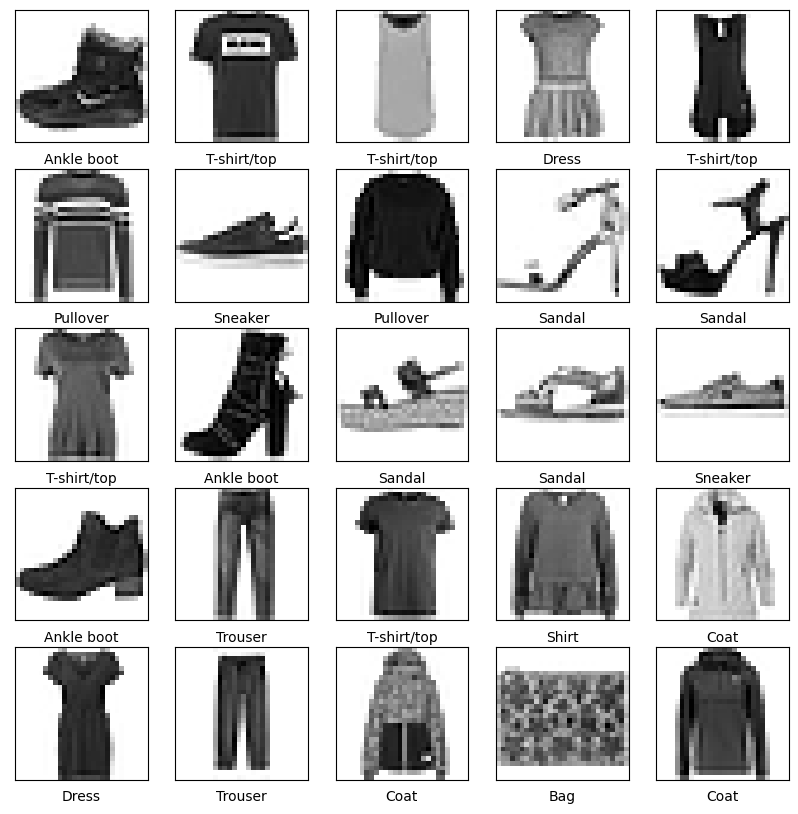

In [45]:
#Make a list of label names
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[train_label[i]])
plt.show()

# Normalization

In [14]:
train_data, test_data = train_data / 255.0, test_data / 255.0
#As the pixel values range from 0 to 256 , So dividing all the values by 255 will convert it to range from 0 to 1

# Create CNN Architecture

In [46]:
Conv2D?

In [50]:
#Set random seed
tf.random.set_seed(42)

#Create model
model = tf.keras.Sequential([
    
   tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding="same", activation="relu",input_shape=(28,28,1)),
   tf.keras.layers.Conv2D(10,3, activation='relu'),
    
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(15,3, activation='relu'),
    
    tf.keras.layers.Conv2D(20,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(25,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax") #Output layer

])

In [51]:
#Compile the model
model.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

#Show summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 5)         50        
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 10)        460       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 15)        1365      
                                                                 
 conv2d_19 (Conv2D)          (None, 9, 9, 20)          2720      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 20)         0         
 g2D)                                                 

In [52]:
# Fit Model 
with tf.device('/GPU:0'):
    results = model.fit(train_data, train_label, epochs=10, validation_data=(test_data, test_label))

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.6912 - accuracy: 0.7460 - val_loss: 0.5232 - val_accuracy: 0.8110
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4713 - accuracy: 0.8278 - val_loss: 0.4783 - val_accuracy: 0.8234
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4029 - accuracy: 0.8541 - val_loss: 0.4019 - val_accuracy: 0.8534
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3611 - accuracy: 0.8681 - val_loss: 0.3763 - val_accuracy: 0.8636
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3362 - accuracy: 0.8794 - val_loss: 0.3722 - val_accuracy: 0.8648
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3154 - accuracy: 0.8853 - val_loss: 0.3532 - val_accuracy: 0.8681
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2993 - accuracy: 0.8913 - val_loss: 0.3446 -

In [53]:
# history from 10 epochs that were ran by a model (loss, accuracy, validation loss, validation accuracy)
results.history

{'loss': [0.6911879777908325,
  0.4712507426738739,
  0.4028674364089966,
  0.361057311296463,
  0.33617737889289856,
  0.3154436945915222,
  0.2992771565914154,
  0.2876979410648346,
  0.277567058801651,
  0.2694242596626282],
 'accuracy': [0.7459999918937683,
  0.8277666568756104,
  0.8541499972343445,
  0.8681166768074036,
  0.8793500065803528,
  0.8852666616439819,
  0.8913499712944031,
  0.8944000005722046,
  0.8986666798591614,
  0.9021999835968018],
 'val_loss': [0.5231729745864868,
  0.4782588481903076,
  0.4018634259700775,
  0.3762628436088562,
  0.3721592426300049,
  0.35316014289855957,
  0.34456005692481995,
  0.3132792115211487,
  0.31137415766716003,
  0.30110836029052734],
 'val_accuracy': [0.8109999895095825,
  0.8234000205993652,
  0.8533999919891357,
  0.8636000156402588,
  0.864799976348877,
  0.8680999875068665,
  0.8737999796867371,
  0.8873999714851379,
  0.8871999979019165,
  0.894599974155426]}

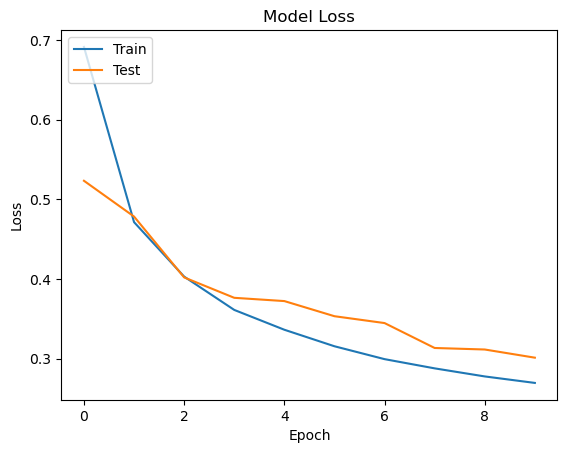

In [54]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

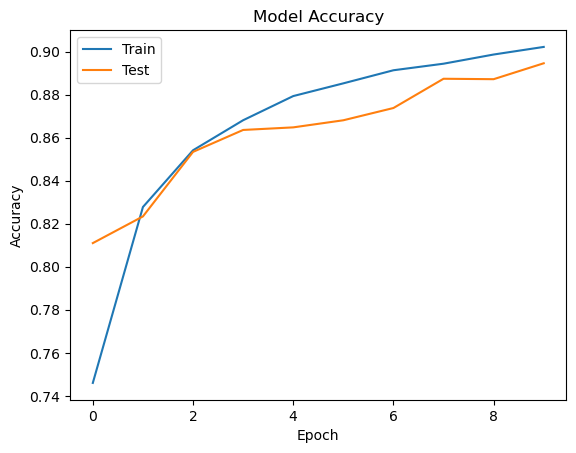

In [55]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

In [56]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)

313/313 - 1s - loss: 0.3011 - accuracy: 0.8946 - 1s/epoch - 5ms/step


In [57]:
# predictions are probability distributions between 0 and 1 (because of softmax)
pred = model.predict(test_data)
pred

313/313 [==============================] - 2s 5ms/step


array([[6.13572055e-08, 1.93834597e-12, 9.48569903e-11, ...,
        1.18522043e-03, 6.16989411e-08, 9.96060312e-01],
       [9.92543646e-05, 1.07883107e-08, 9.95752096e-01, ...,
        1.47237049e-11, 4.38499546e-06, 2.06385380e-08],
       [1.36064751e-08, 9.99989033e-01, 2.91441027e-09, ...,
        4.89283591e-09, 1.28673616e-06, 2.60866523e-10],
       ...,
       [1.54374220e-06, 2.69167511e-09, 3.35582536e-06, ...,
        6.37398472e-08, 9.99993086e-01, 3.66413233e-09],
       [1.92269614e-08, 9.99986768e-01, 2.62361652e-08, ...,
        4.85827316e-11, 6.79806922e-09, 4.06751412e-12],
       [1.40166285e-05, 2.50895050e-06, 2.09308246e-06, ...,
        7.74942711e-02, 2.61503737e-03, 4.80839080e-04]], dtype=float32)

In [58]:
# So we need to find which is the max
# for this we can use argmax function from numpy
print(pred[0])
# it gives an index of maximum value
np.argmax(pred[0])

[6.1357206e-08 1.9383460e-12 9.4856990e-11 6.5165602e-11 1.0104733e-11
 2.7542212e-03 1.1392477e-11 1.1852204e-03 6.1698941e-08 9.9606031e-01]


9

In [59]:
# we can convert predictions into labels by computing argmax for each 
pred_classes = [np.argmax(element) for element in pred]
pred_classes

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 4,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 4,
 6,
 0,
 9,
 4,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 6,
 7,
 4,
 7,
 2,
 1,
 2,
 6,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 6,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 4,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 6,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 4,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 4,
 2,
 2,


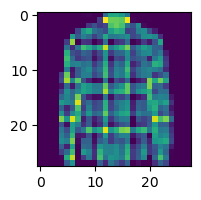

In [76]:
plt.figure(figsize=(2,2))
plt.imshow(test_data[7])

In [63]:
# compare true vs prediced
from sklearn.metrics import classification_report
print(classification_report(test_label, pred_classes))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.82      0.84      1000
           3       0.88      0.91      0.89      1000
           4       0.78      0.91      0.84      1000
           5       0.97      0.98      0.97      1000
           6       0.76      0.63      0.69      1000
           7       0.95      0.96      0.95      1000
           8       0.95      0.98      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

